In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

#  Dog and Cat using RNN

### Team members:
* Ziyi Wang ID 18042783
* Youzhi Lei ID  19039281
* Zhichun Wang ID 19024898


## Content
* Loading datasets and resize data split to training and testing
* Using the RNN 
---


Information about datasets
Labeled vehicles and animals from:

    Images of various types of vehicles and animals http://www.cs.toronto.edu/%7Ekriz/cifar.html
  

In [1]:
#!pip install opencv-python

In [2]:
#!pip install tensorflow

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import patsy
import os
from PIL import Image 
import cv2
%matplotlib inline

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.13.0-rc1


In [3]:
from pylab import rcParams

sns.set(style="ticks")
#sns.set_style("whitegrid")
rcParams['figure.dpi'] = 150
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'
rcParams['figure.figsize'] = 10,8
rcParams['font.size'] = 14
rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14

pd.options.display.max_columns = 50

In [4]:
import os
cwd = os.getcwd()
print(cwd)
#Please put the data to current location, Thanks 
DATADIR = "../cifar-10-batches-py/"
DATADIR = os.path.join(cwd, DATADIR)

/home/dp1/Documents/fred/codes/machinelearning2019/cifar10


This image is a b'frog' . Its label is 6
10 categories: [b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck']


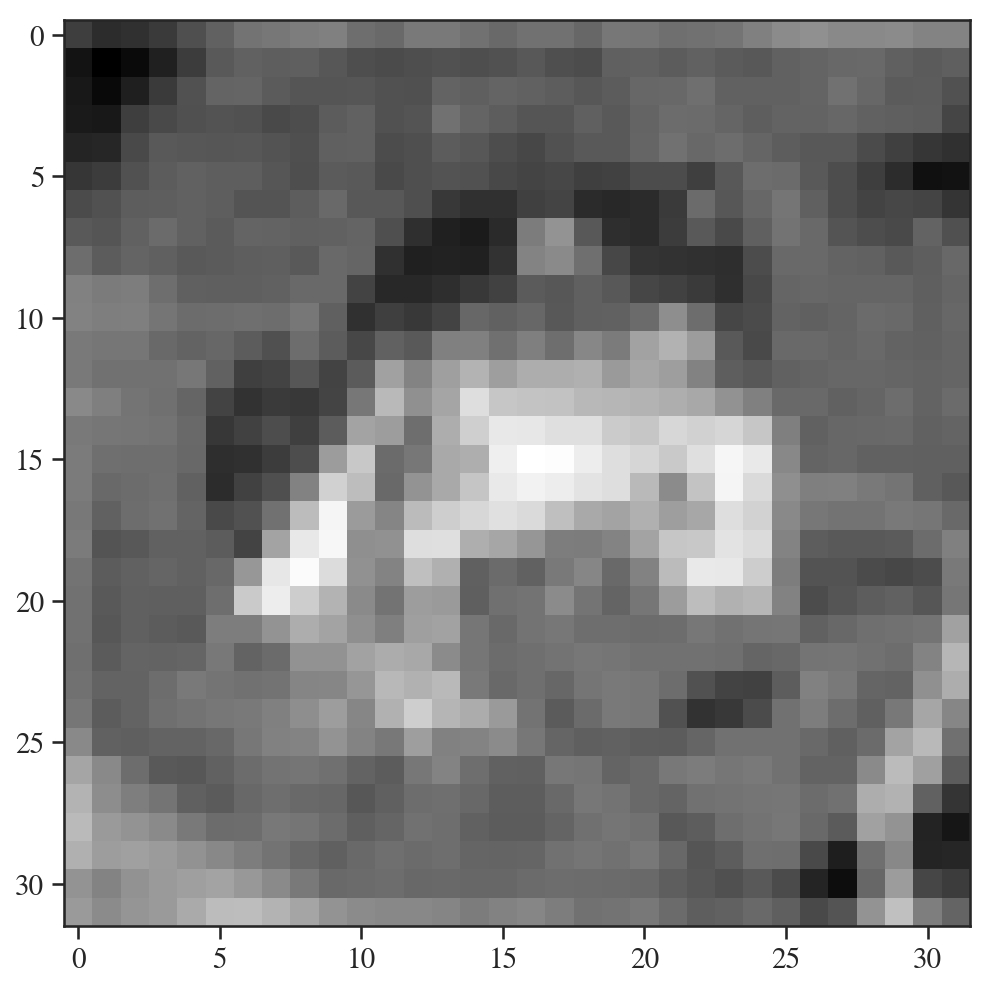

In [5]:

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Choose one image randomly, just to display it
batch = unpickle(DATADIR+"data_batch_1")

# For more detail on the dataset files, see http://www.cs.toronto.edu/%7Ekriz/cifar.html 
IMG_SIZE = 32 # each image in the dataset is 32*32, color
img_array = batch[b'data'][0].reshape(3, 1024)
ziplist = list(zip(img_array[2], img_array[1], img_array[0]))
newarray = np.array(ziplist).reshape(IMG_SIZE, IMG_SIZE, 3)

plt.imshow(newarray)
plt.show

img_array = cv2.cvtColor(newarray, cv2.COLOR_BGR2GRAY)
plt.imshow(img_array, cmap='gray')
plt.show

metafile = unpickle(DATADIR+"batches.meta") 
print("This image is a", metafile[b'label_names'][batch[b'labels'][0]], ". Its label is", batch[b'labels'][0])

CATEGORIES = []
for i in range(len(metafile[b'label_names'])):
    CATEGORIES.append(metafile[b'label_names'][i])

print(len(metafile[b'label_names']), "categories:", CATEGORIES)
        

In [6]:
import random

training_data = []
testing_data = []

def create_training_data():    
    for batchfile in os.listdir(DATADIR):
        try:
            if (batchfile.startswith("data_batch_") or batchfile == 'test_batch'):                
                batch = unpickle(os.path.join(DATADIR, batchfile))
                print(len(batch[b'data']), "images are in", batchfile)
                for i in range(len(batch[b'data'])): # There should be 10000 images in each batch                    
                    # 1024 red values, then 1024 green values, then 1024 blue values
                    img_array = batch[b'data'][i].reshape(3, 1024) 
                    #print("shape is", img_array.shape)
                    # Note that OpenCV needs BGR instead of RGB
                    ziplist = list(zip(img_array[2], img_array[1], img_array[0])) 
                    img_array = np.array(ziplist).reshape(IMG_SIZE, IMG_SIZE, 3)
                    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                    if (batchfile.startswith("data_batch_")):
                        training_data.append([img_array, batch[b'labels'][i]])
                    else:
                        testing_data.append([img_array, batch[b'labels'][i]])
            

        except Exception as e:
            pass#pass the image if they broken    
    
create_training_data()


10000 images are in data_batch_5
10000 images are in data_batch_2
10000 images are in data_batch_3
10000 images are in data_batch_4
10000 images are in test_batch
10000 images are in data_batch_1


In [7]:
print(len(training_data))
print(len(testing_data))


50000
10000


In [8]:
#seperate dataset
import random
random.shuffle(training_data)
#random.shuffle(testing_data)

In [9]:
#featurs set
train_images = []
#label
train_labels = []
#featurs set
test_images = []
#label
test_labels = []

In [10]:
for features, label in training_data:
    train_images.append(features)
    train_labels.append(label)
#conver numpy array in CNN network, -1 means how many featurs do we have and 1 means grey image
train_images = np.array(train_images).reshape(-1, IMG_SIZE, IMG_SIZE,1)
train_images.shape

(50000, 32, 32, 1)

In [11]:
for features, label in testing_data:
    test_images.append(features)
    test_labels.append(label)
#conver numpy array in CNN network, -1 means how many featurs do we have and 1 means grey image
test_images = np.array(test_images).reshape(-1, IMG_SIZE, IMG_SIZE,1)

In [12]:
import pickle

pickle_out = open("train_images.pickle", "wb")
pickle.dump(train_images, pickle_out)
pickle_out.close()

pickle_out = open("train_labels.pickle", "wb")
pickle.dump(train_labels, pickle_out)
pickle_out.close()

pickle_in = open("train_images.pickle", "rb")
train_images = pickle.load(pickle_in)
pickle_in.close()
train_images.shape

(50000, 32, 32, 1)

In [13]:
print(train_images.shape)
print(len(train_labels))

(50000, 32, 32, 1)
50000


In [14]:
#pickle for testr 
pickle_out = open("test_images.pickle", "wb")
pickle.dump(test_images, pickle_out)
pickle_out.close()

pickle_out = open("test_labels.pickle", "wb")
pickle.dump(test_labels, pickle_out)
pickle_out.close()

#test 
pickle_in = open("test_images.pickle", "rb")
test_images = pickle.load(pickle_in)
pickle_in.close()

In [15]:
print(test_images.shape)
print(len(test_labels))

(10000, 32, 32, 1)
10000


In [16]:
train_x = train_images/255


train_x = train_x[:, :,:,-1]
print(train_x.shape)

(50000, 32, 32)


In [17]:
test_x = test_images/255
test_x.shape
test_x = test_x[:, :,:,-1]
print(train_x.shape)
print(len(train_labels))

(50000, 32, 32)
50000


after above one can do RNN model training

### RNN Network

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense

In [20]:
lstm_units = 200
BATCH_SIZE = 64

num_classes = len(CATEGORIES)
print(num_classes)
model = Sequential() 
model.add(LSTM(units = lstm_units,input_shape = train_x.shape[1:], dropout=0.25, return_sequences=True)) # 3D tensor with shape (batch_size, timesteps, input_dim).
model.add(LSTM(units = lstm_units, dropout=0.25))
model.add(Dense(num_classes, activation='softmax'))

10


In [21]:

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 32, 200)           186400    
_________________________________________________________________
lstm_3 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
Total params: 509,210
Trainable params: 509,210
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [23]:
%%time
hist = model.fit(train_x, train_labels, batch_size=64 ,epochs=10, validation_data=(test_x,test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 70s 1ms/sample - loss: 2.0185 - acc: 0.2562 - val_loss: 1.8176 - val_acc: 0.3409
Epoch 2/10
50000/50000 [==============================] - 68s 1ms/sample - loss: 1.7909 - acc: 0.3491 - val_loss: 1.6692 - val_acc: 0.4003
Epoch 3/10
50000/50000 [==============================] - 68s 1ms/sample - loss: 1.6737 - acc: 0.3955 - val_loss: 1.5960 - val_acc: 0.4244
Epoch 4/10
50000/50000 [==============================] - 68s 1ms/sample - loss: 1.5887 - acc: 0.4293 - val_loss: 1.5340 - val_acc: 0.4486
Epoch 5/10
50000/50000 [==============================] - 68s 1ms/sample - loss: 1.5142 - acc: 0.4577 - val_loss: 1.4683 - val_acc: 0.4703
Epoch 6/10
50000/50000 [==============================] - 69s 1ms/sample - loss: 1.4487 - acc: 0.4824 - val_loss: 1.4272 - val_acc: 0.4917
Epoch 7/10
50000/50000 [==============================] - 69s 1ms/sample - loss: 1.3937 - acc: 0.5030 - val_loss: 1.

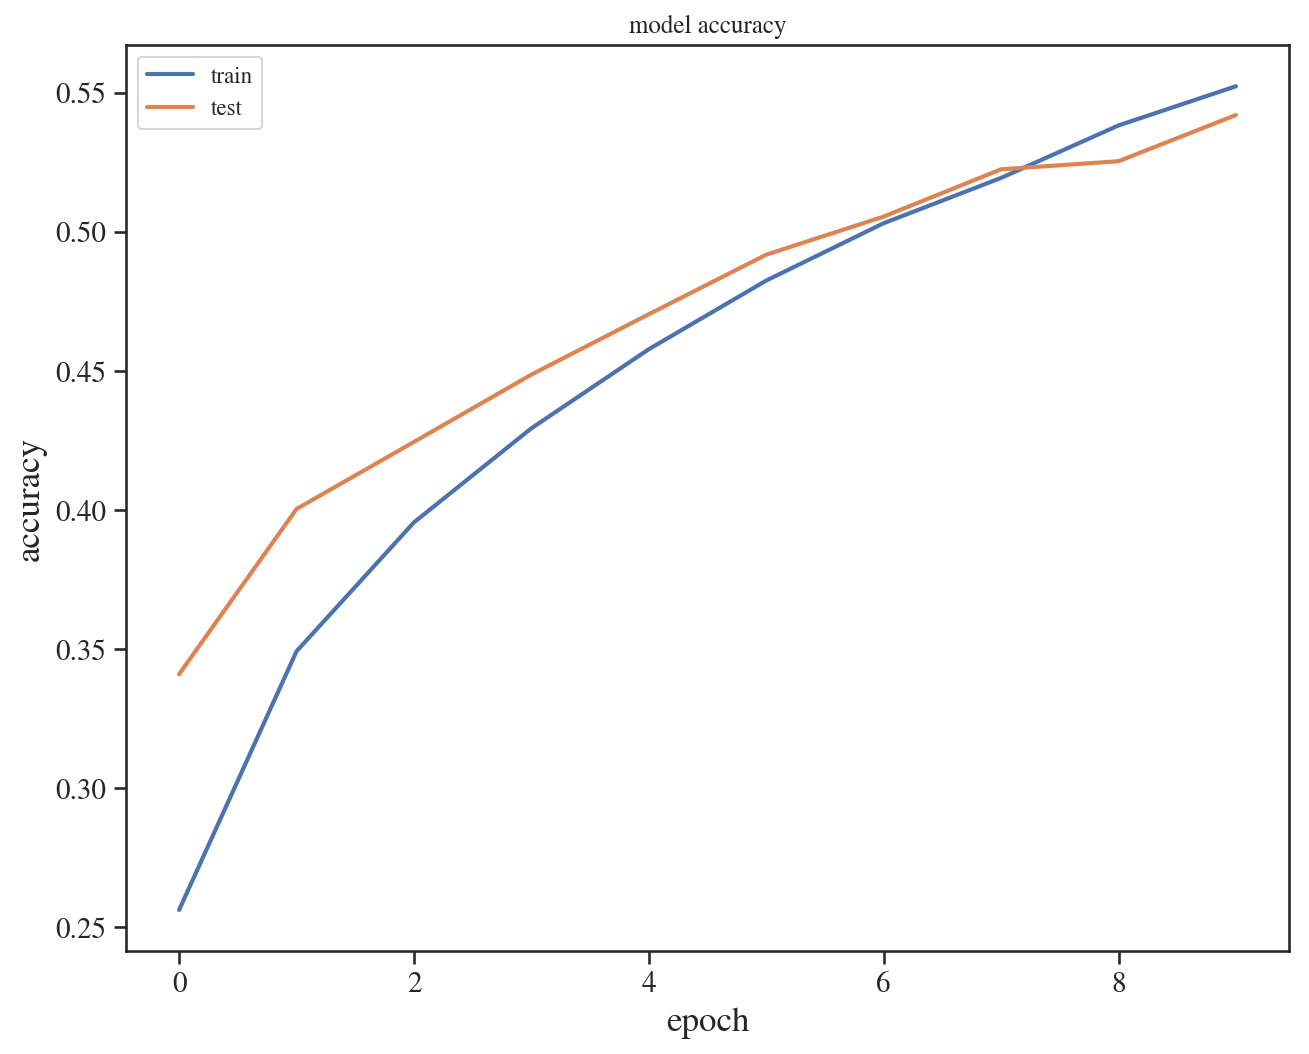

In [24]:
# summarize history for accuracy
plt.figure()
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

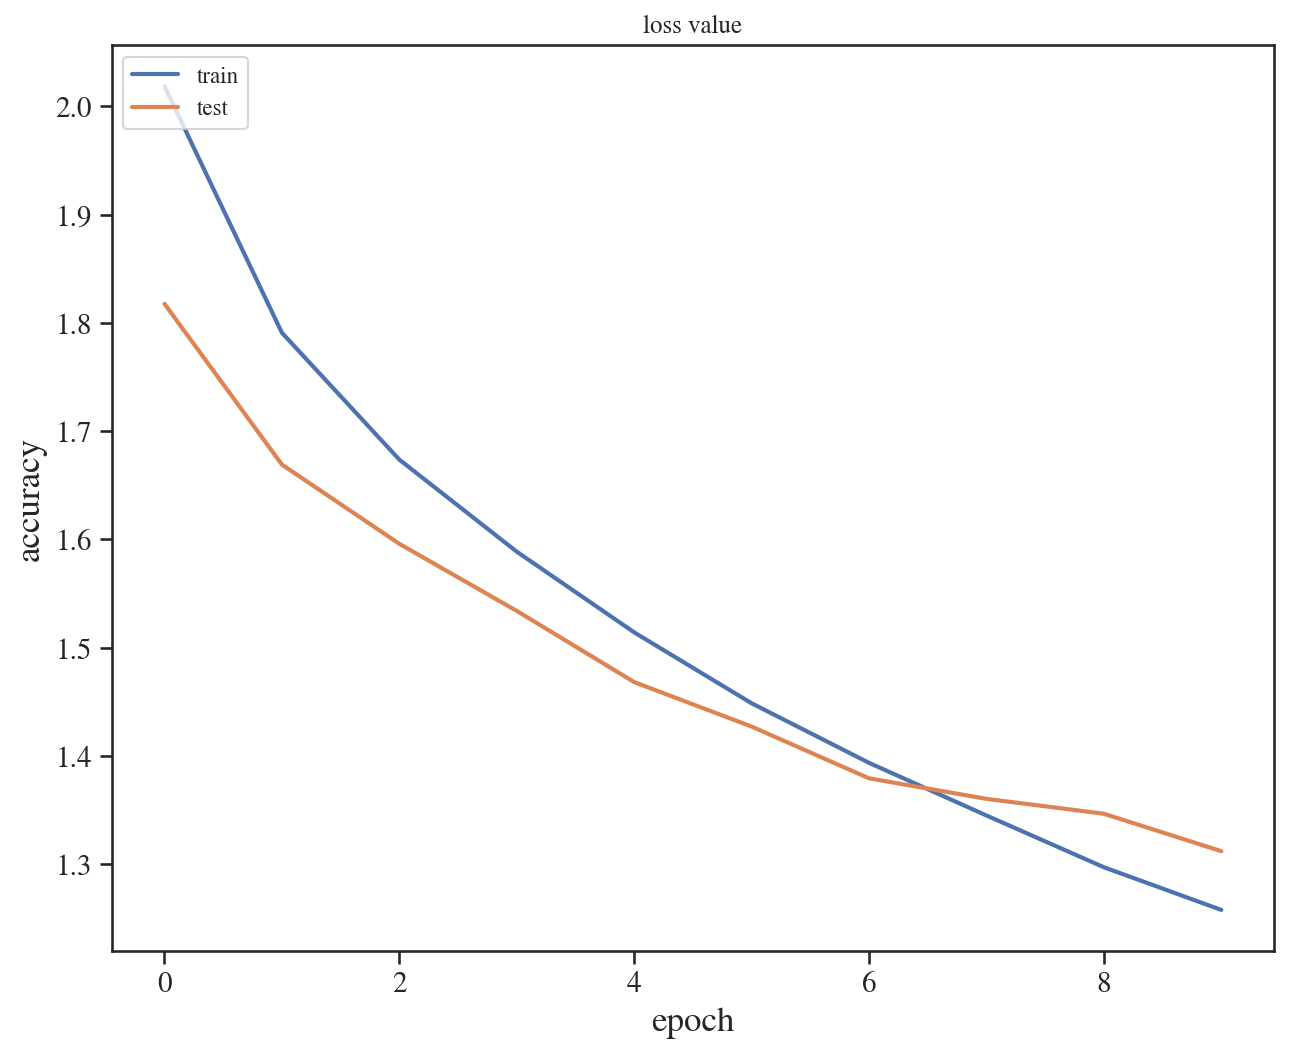

In [25]:
# summarize history for loss value
plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss value')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(test_x, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 4s 381us/sample - loss: 1.3121 - acc: 0.5419
Test accuracy: 0.5419


In [27]:
predictions = model.predict(test_x)

In [28]:
predictions[2]

array([0.12782595, 0.0066368 , 0.1171321 , 0.04052496, 0.15552776,
       0.06830336, 0.00670933, 0.17081739, 0.29588422, 0.01063811],
      dtype=float32)